### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy.random import random, seed, normal

## From local directory
from oscillators import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/Users/william/python_files/kurep_paper/oscillators.py:44: UserWarning: Compiled Cython library not found, some functions will run slower
  warnings.warn("Compiled Cython library not found, some functions will run slower")


### Avalanches in the order parameter

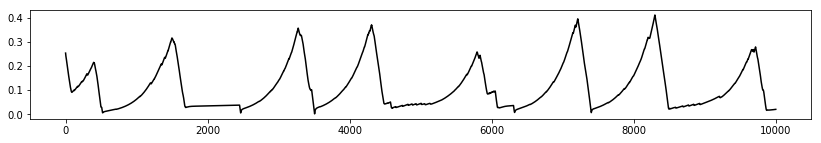

In [2]:

## Set oscillator parameters
n_test = 30
kval, rval, wspread = 0.008, .35, 0.0

## Define oscillator object
ts = CoupledOscillators(n_test, np.ones(n_test), kval*np.ones((n_test, n_test)), 
                        coupling='kuramoto_single_repulsion', use_c=False,
                       repel_val=rval, repel_length=1.02, num_repel=n_test)

## Set simulation parameters
seed(5)
t_len = 10000
tpts_cycle = 20
ic = 2*np.pi*np.random.random(n_test)
dt = 1/tpts_cycle
tpts = np.arange(0, t_len, dt)

## Run simulation
out = ts.run_simulation(ic, tpts, method="odeint")

## Calculate order parameter
r1, _ = find_daido(out)

## Plot results
plt.figure(figsize=(14,2))
plt.plot(tpts, r1, 'k')